# Exercise 1
What is the fundamental idea behind support vector machines?


Support vector machines try to fit the widest possible street between the classes. </br> 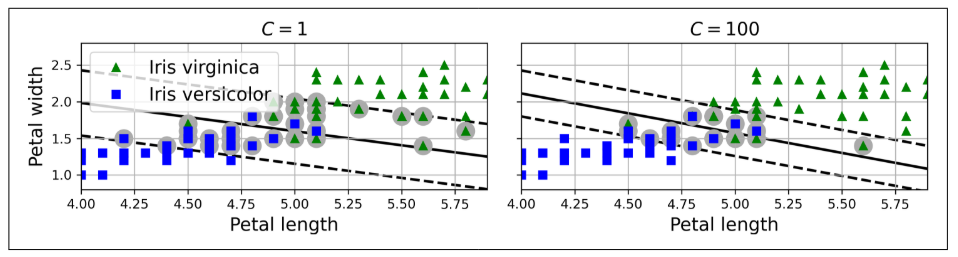

# Exercise 2
What is a support vector?

A support vector is an instance of the dataset located at the edge of the street. </br> 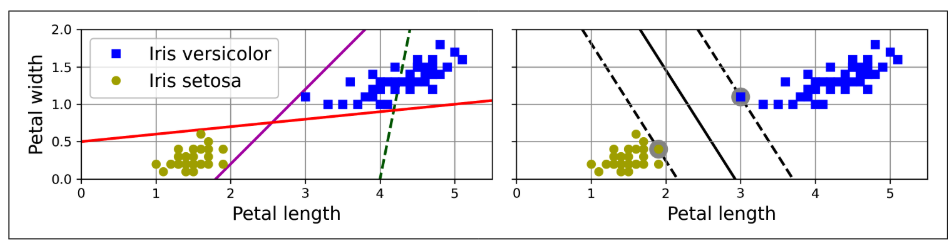

# Exercise 3
Why is it important to scale the inputs when using SVMs?

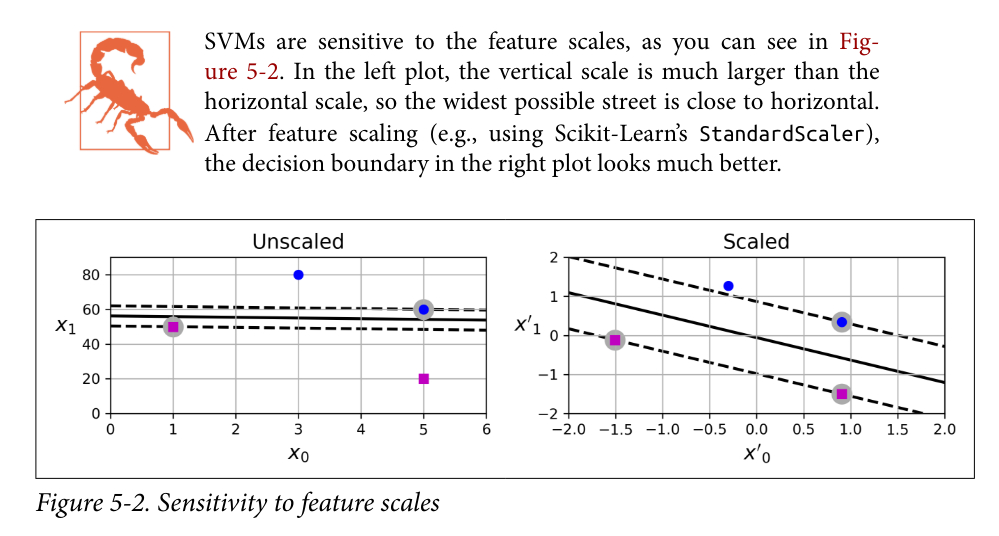 </br> If the scale is off, then one feature can have very small effect on decision.

# Exercise 4
Can an SVM classifier output a confidence score when it classifies an instance?
What about a probability?

No, it can't but it can be done with a certain class. </br> 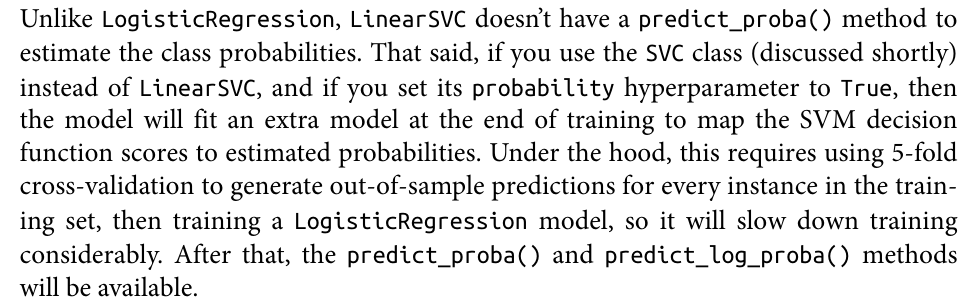

# Exercise 5
How can you choose between LinearSVC, SVC, and SGDClassifier?

You should use LinearSVC if it's possible cause it's the fastest, SVC when you need to use kernel other than linear and SGD when the dataset is large or when the model can't fit into RAM and you need to implement out-of-core training.

# Exercise 6
Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit
the training set. Should you increase or decrease γ (gamma)? What about C?

You should increase the gamma. C can also be increased. </br> 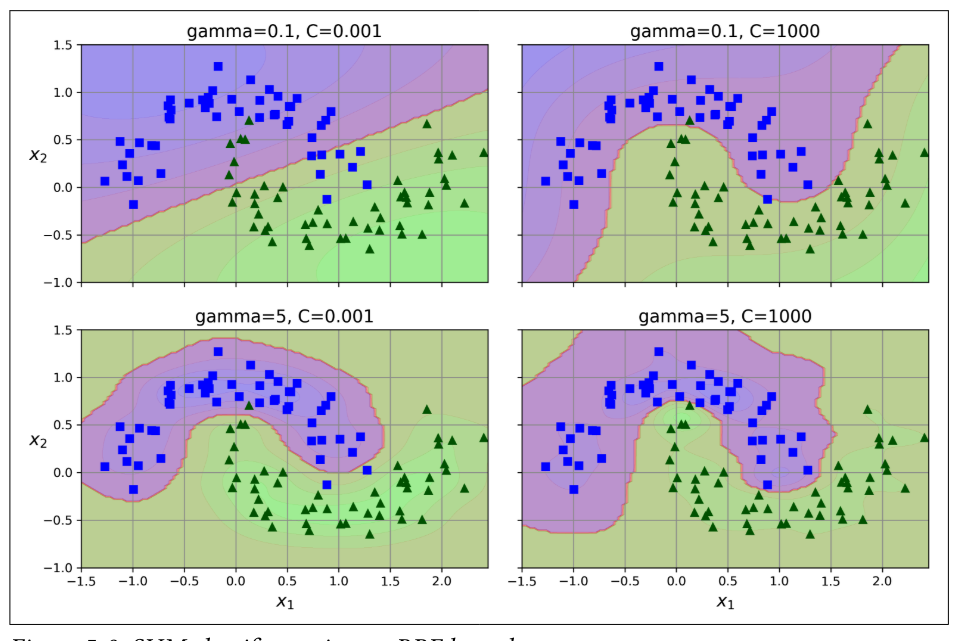

# Exercise 7
What does it mean for a model to be ϵ-insensitive?

If you add more training instances within the margin it will not affect the model. </br> 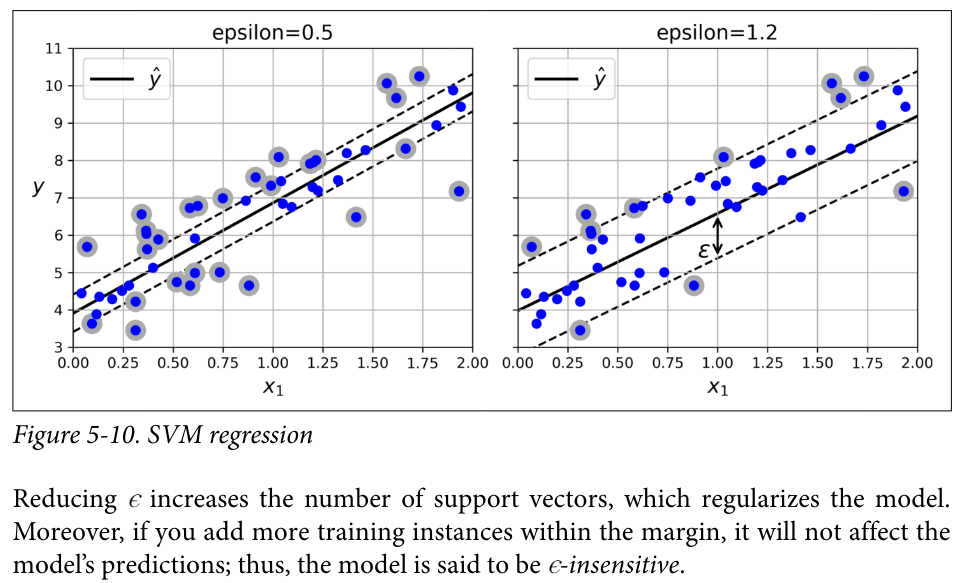

# Exercise 8
What is the point of using the kernel trick?

The kernel trick make it possible to get the same result as if adding many polynomial features without actually adding them.

# Exercise 9
Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model.

In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]].values
y = iris.target == 0

In [2]:
X[:5], y[:5]

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6]]),
 0    True
 1    True
 2    True
 3    True
 4    True
 Name: target, dtype: bool)

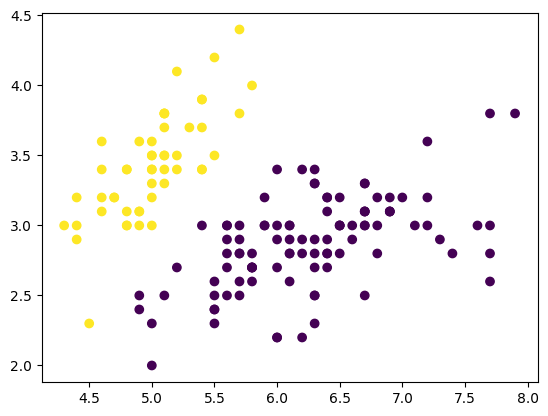

In [3]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linear_svc_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=42)
)

linear_svc_clf.fit(X, y)

svc_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="linear", random_state=42)
)

svc_clf.fit(X, y)

sgd_clf = make_pipeline(
    StandardScaler(),
    SGDClassifier(random_state=42, penalty="l2", alpha=0.4)
)

sgd_clf.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(alpha=0.4, random_state=42))])

In [5]:
import numpy as np

def show_contour_plot(X, y, clf):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.show()

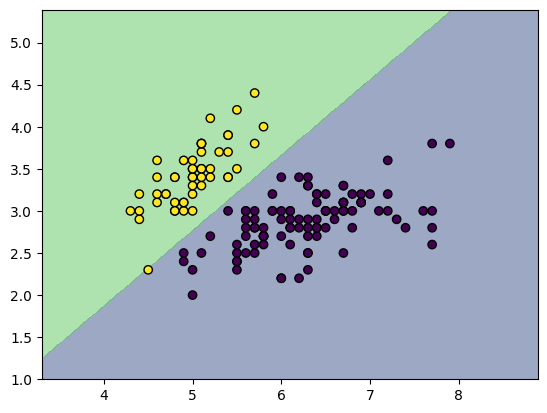

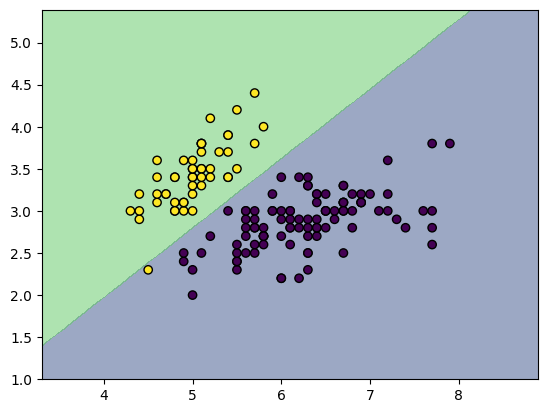

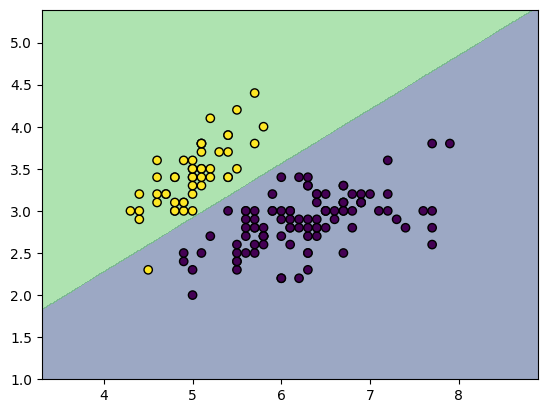

In [6]:
show_contour_plot(X, y, linear_svc_clf)
show_contour_plot(X, y, svc_clf)
show_contour_plot(X, y, sgd_clf)

# Exercise 10
Train an SVM classifier on the wine dataset, which you can load using
sklearn.datasets.load_wine(). This dataset contains the chemical analyses
of 178 wine samples produced by 3 different cultivators: the goal is to train
a classification model capable of predicting the cultivator based on the wine’s
chemical analysis. Since SVM classifiers are binary classifiers, you will need to
use one-versus-all to classify all three classes. What accuracy can you reach?

In [7]:
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

X, y = load_wine(as_frame=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
2,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0
3,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
4,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0
138,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
139,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
140,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0


In [8]:
sgd_clf = make_pipeline(
    StandardScaler(),
    SVC(random_state=42)
)

sgd_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [9]:
y_test_preds = sgd_clf.predict(X_test)
y_train_preds = sgd_clf.predict(X_train)

In [10]:
test_accuracy = accuracy_score(y_test, y_test_preds)
train_accuracy = accuracy_score(y_train, y_train_preds)

print(f"Test accuracy: {test_accuracy}, Train accuracy: {train_accuracy}")

Test accuracy: 1.0, Train accuracy: 1.0


# Exercise 11
Train and fine-tune an SVM regressor on the California housing dataset. You can
use the original dataset rather than the tweaked version we used in Chapter 2,
which you can load using sklearn.datasets.fetch_california_housing().
The targets represent hundreds of thousands of dollars. Since there are over
20,000 instances, SVMs can be slow, so for hyperparameter tuning you should
use far fewer instances (e.g., 2,000) to test many more hyperparameter combina‐
tions. What is your best model’s RMSE?

In [11]:
housing = pd.read_csv("datasets/housing/housing.csv")

X, y = housing.drop(columns=["median_house_value"]), housing[["median_house_value"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)
X_train

X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [12]:
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

make_pipeline( SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))
# Define the pipeline
svm_reg = make_pipeline(
    make_column_transformer(
        # (SimpleImputer(strategy="most_frequent"), ["ocean_proximity"]),  # Impute missing values in categorical variable
        (SimpleImputer(strategy="mean"), make_column_selector(dtype_include=np.number)),
        (OneHotEncoder(handle_unknown="ignore"), ["ocean_proximity"]),  # One-hot encode the categorical variable
    ),        
    SVR() # C, epsilon, kernel_type, gamma, coef0
)

# Fit the pipeline
svm_reg.fit(X_train, np.array(y_train).ravel())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x763a036f2cd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('svr', SVR())])

In [13]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV

y_train_pred = svm_reg.predict(X_train)
y_test_pred = svm_reg.predict(X_test)
train_error = root_mean_squared_error(y_train, y_train_pred)
test_error = root_mean_squared_error(y_test, y_test_pred)
print(f"Train error: {train_error} Test error: {test_error}")

Train error: 117398.97108519713 Test error: 118354.07296626177


In [14]:
param_grid = {
    "svr__kernel": ("linear", "rbf"),
    "svr__C": [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(n_jobs=-1, estimator=svm_reg, cv=3, param_grid=param_grid, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train[:2000], np.array(y_train[:2000]).ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('simpleimputer',
                                                                         SimpleImputer(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x763a036f2cd0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.01, 0.1, 1, 10, 100],
                         'svr__kernel': ('linear', 'rbf')},
             scoring='neg_root_mean_squared_error')

In [16]:
grid_search.best_score_, grid_search.best_params_

(-72579.16296094039, {'svr__C': 100, 'svr__kernel': 'linear'})